In [66]:
# Import needed packages
# You may add or remove packages should you need them
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score

# Set random seed
np.random.seed(0)

# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

In [67]:
# Load the Iris dataset included with scikit-learn
iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [68]:
# Put data in a pandas DataFrame

df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

In [69]:
# Add target and class to DataFrame

df_iris['target'] = pd.Series(iris.target)
df_iris['class'] = pd.Series(iris.target)

df_iris.loc[df_iris.target == 0, 'class'] = 'setosa'
df_iris.loc[df_iris.target == 1, 'class'] = 'versicolor'
df_iris.loc[df_iris.target == 2, 'class'] = 'virginica'



In [70]:
# Show 10 random samples

df_iris.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
114,5.8,2.8,5.1,2.4,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa
107,7.3,2.9,6.3,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa
100,6.3,3.3,6.0,2.5,2,virginica
40,5.0,3.5,1.3,0.3,0,setosa
86,6.7,3.1,4.7,1.5,1,versicolor
76,6.8,2.8,4.8,1.4,1,versicolor
71,6.1,2.8,4.0,1.3,1,versicolor


# PCA Exercise
Taking in consideration the iris dataset, answer the following questions. **You may have to run some code first :)**
1. How many **principal components can we consider**?
2. How do you think is going to be the **cumulated percentage of explained variance** attending to the number of components? Calculate it.
3. Consider the necessary number of components to explain at least a **99% of the variance**. Give the equations to calculate these components.
4. Calculate the **new values** for this decomposition and plot them.
5. Repeat the steps 3 and 4 **taking a 95% of the variance**

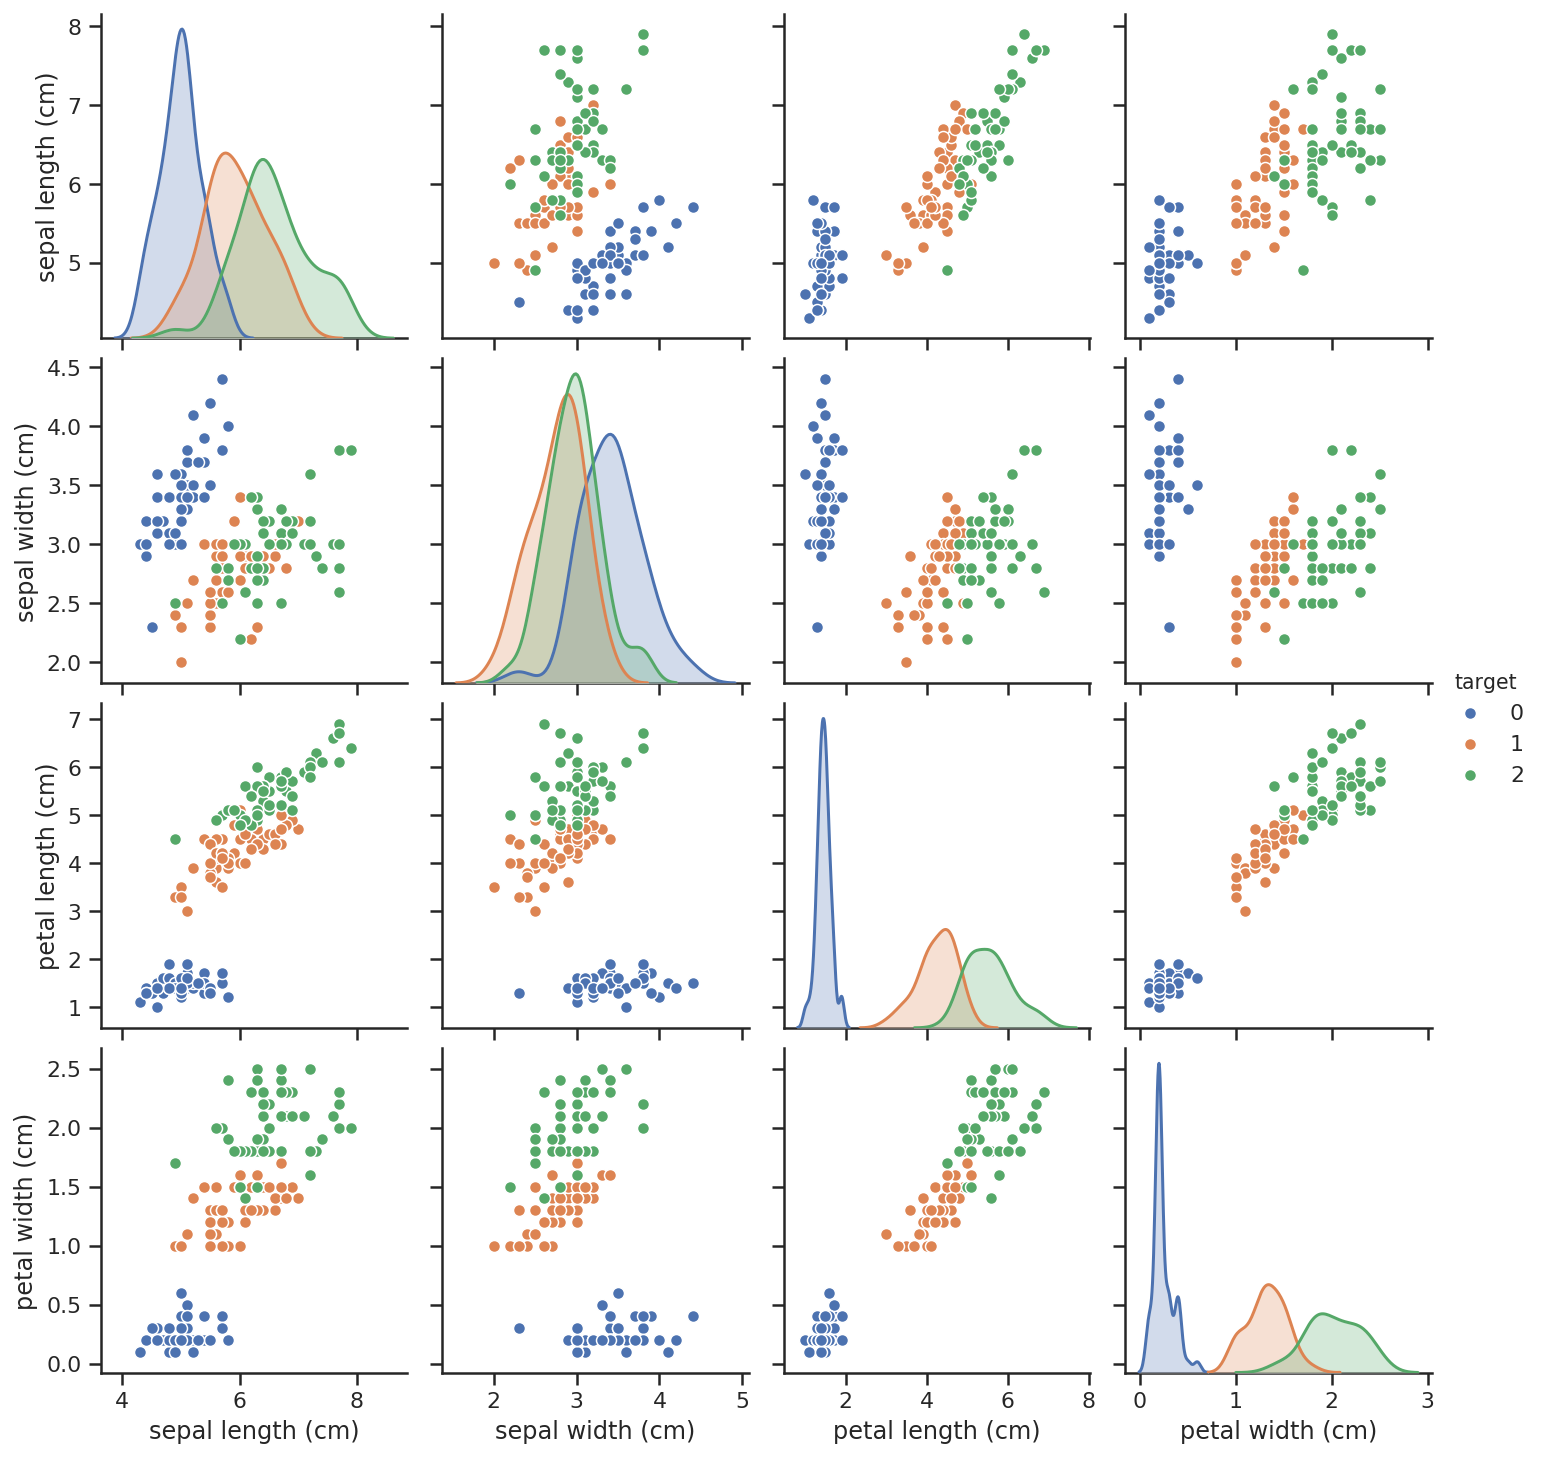

In [71]:
# A graph to help you out
sns.set(style="ticks")
sns.pairplot(data = df_iris.loc[:,:"target"], hue = 'target')

In [85]:
# Run the PCA model here

from sklearn.decomposition import PCA

pca = PCA()
df_pca = df_iris.drop(['target', 'class'], axis=1)
transf = pca.fit_transform(df_pca)
df_transf = pd.DataFrame(transf)
df_components = pd.DataFrame(pca.components_)
df_pca.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [73]:
# You should end up with a transformed dataframe
df_transf

,0,1,2,3
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259
...,...,...,...,...
145,1.944110,0.187532,0.177825,-0.426196
146,1.527167,-0.375317,-0.121898,-0.254367
147,1.764346,0.078859,0.130482,-0.137001
148,1.900942,0.116628,0.723252,-0.044595


In [74]:
# check the variance in each component

y_variance = pca.explained_variance_ratio_
print(y_variance)
variance_sum = np.sum(y_variance)
variance_sum

[0.92461872 0.05306648 0.01710261 0.00521218]


1.0

In [86]:
# cross it with the dataframe and to what it corresponds

df_components['variance'] = pd.Series(y_variance)
df_components

,0,1,2,3,variance
0,0.361387,-0.084523,0.856671,0.358289,0.924619
1,0.656589,0.730161,-0.173373,-0.075481,0.053066
2,-0.582030,0.597911,0.076236,0.545831,0.017103
3,-0.315487,0.319723,0.479839,-0.753657,0.005212


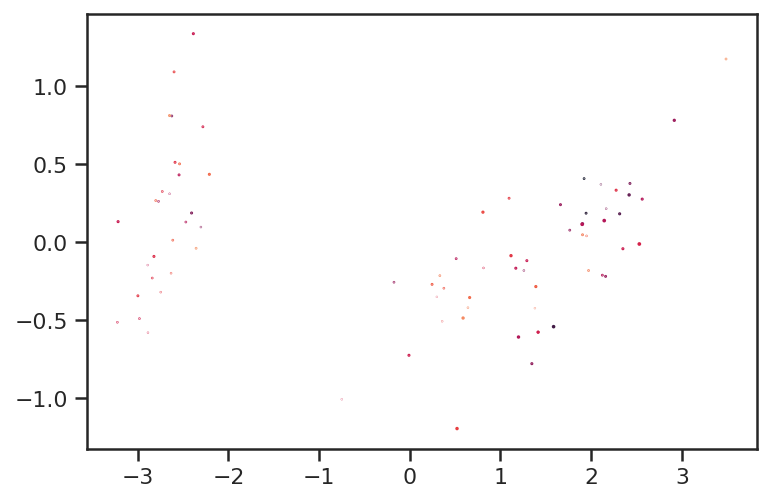

In [95]:
# plot it!

plt.scatter(df_transf[0], df_transf[1], df_transf[2], df_transf[3])

In [78]:
# to explain 99% of the data I need 3 components.
pca_3 = PCA(n_components=3)
pca_3.fit_transform(df_pca)
df_pca_3 = pd.DataFrame(pca_3.components_)
df_pca_3

,0,1,2,3
0,0.361387,-0.084523,0.856671,0.358289
1,0.656589,0.730161,-0.173373,-0.075481
2,-0.582030,0.597911,0.076236,0.545831


In [79]:
y3_variance = pca_3.explained_variance_ratio_
print(y3_variance)
np.sum(y3_variance)

[0.92461872 0.05306648 0.01710261]


0.9947878161267246

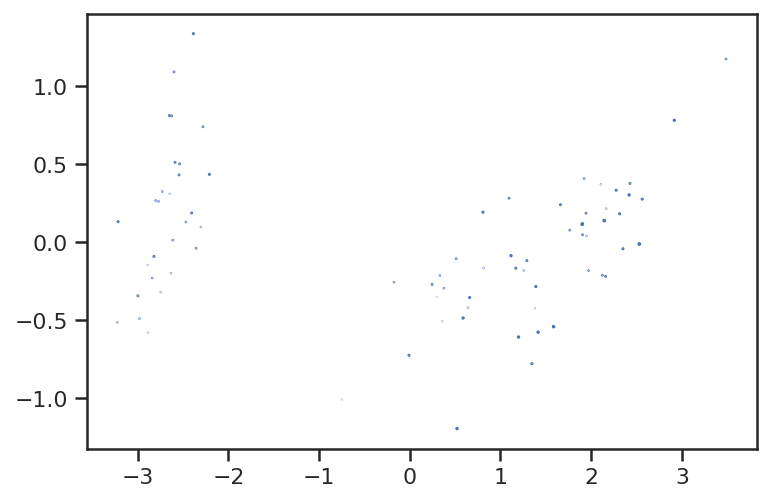

In [97]:
transf3 = pca_3.fit_transform(df_pca)
df_transf3 = pd.DataFrame(transf3)

plt.scatter(df_transf3[0], df_transf3[1], df_transf3[2])

In [81]:
# to explain 95% of the data I need 2 components
pca_2 = PCA(n_components=2)
pca_2.fit_transform(df_pca)
df_pca_2 = pd.DataFrame(pca_2.components_)
df_pca_2

,0,1,2,3
0,0.361387,-0.084523,0.856671,0.358289
1,0.656589,0.730161,-0.173373,-0.075481


In [82]:
y2_variance = pca_2.explained_variance_ratio_
print(y2_variance)
np.sum(y2_variance)

[0.92461872 0.05306648]


0.9776852063187949

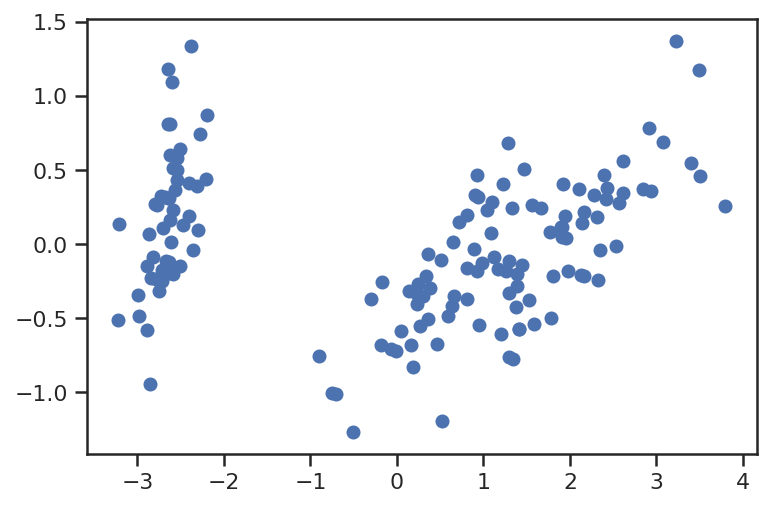

In [98]:
transf2 = pca_2.fit_transform(df_pca)
df_transf2 = pd.DataFrame(transf2)

plt.scatter(df_transf2[0], df_transf2[1])

In [101]:
# applying RandomForestClassifier to the 3 principal component analysis

X = df_transf3
y = df_iris['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessing.StandardScaler().fit_transform(X_train)
X_test = preprocessing.StandardScaler().fit_transform(X_test)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier().fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9666666666666667

In [102]:
# applying RandomForestClassifier to the 2 principal component analysis

X = df_transf2
y = df_iris['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessing.StandardScaler().fit_transform(X_train)
X_test = preprocessing.StandardScaler().fit_transform(X_test)

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier().fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9